# Clustering of Beers

A new beer company is about to enter the market. So the company would like to decide the kind of beer it has to launch.To understand the specification, the company takes some samples of beer brands.

Dataset link: https://www.wileyindia.com/catalog/product/view/id/6915/s/machine-learning-using-pyhon/

The dataset has following features :

name

calories in kj

sodium in mg

alcohol in ml

cost in dollors

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
beer_df = pd.read_csv("C:\\Users\\Sachin acharya\\Downloads\\Codes-Data-Files\\Machine Learning (Codes and Data Files)\\Data\\beer.csv")
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [23]:
beer_df.shape

(20, 5)

The dataset is comprised of 20 rows and 5 features.

In [24]:
df1 = beer_df.drop(['name'],axis=1)               #Removing name to have numerical data for analysis
df1.head()

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77


# Multivariate analysis

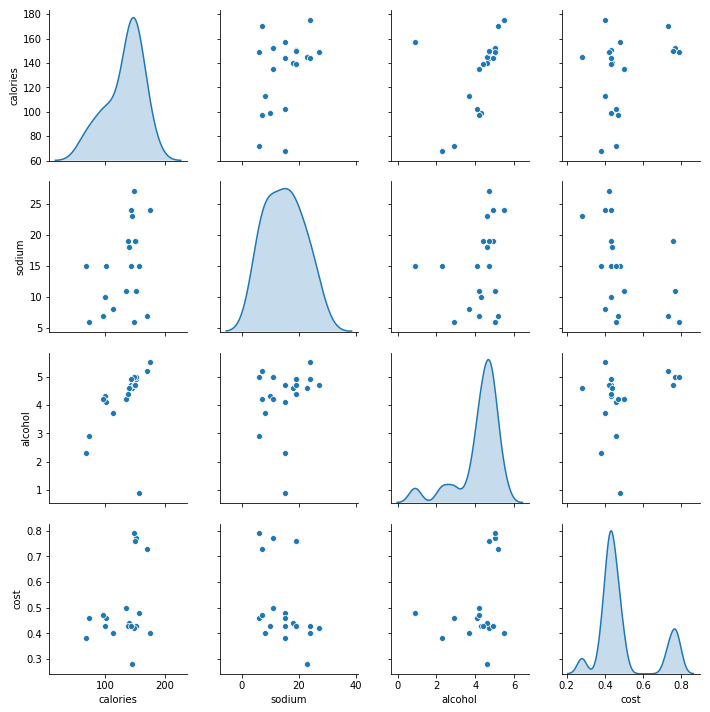

In [25]:
sns.pairplot(df1,diag_kind='kde')

As all the columns in the dataset have different scale, it is not possible to bring out the impact of all the features in the clusters. So scaling has to be done.

# Scaling the data using z-score

In [31]:
from scipy.stats import zscore
df_scaled = df1.apply(zscore)
df_scaled.head()

,calories,sodium,alcohol,cost
0,0.387913,0.007795,0.433808,-0.456830
1,0.625066,0.631369,0.622420,-0.456830
2,0.828339,0.007795,-3.149822,-0.102698
3,1.268765,-1.239354,0.905338,1.667960
4,0.658944,-0.615780,0.716726,1.951265


# Building the clustering model - K-Means algorithm

In [32]:
from sklearn.cluster import KMeans

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    model = KMeans(num_clusters)
    model.fit(df_scaled)
    cluster_errors.append(model.inertia_)

In [33]:
cluster_errors

[80.0,
 51.45915294696046,
 27.849901261962508,
 18.566434751266414,
 12.388814853702119,
 9.719726985235875,
 7.2329082920535495,
 6.067915065175507,
 4.788812497894437,
 3.9503628074864046,
 2.805755519511925,
 1.9759284907227754,
 1.5367500868688033,
 1.102011319186869]

# Finding the optimal value of 'k' using Elbow curve

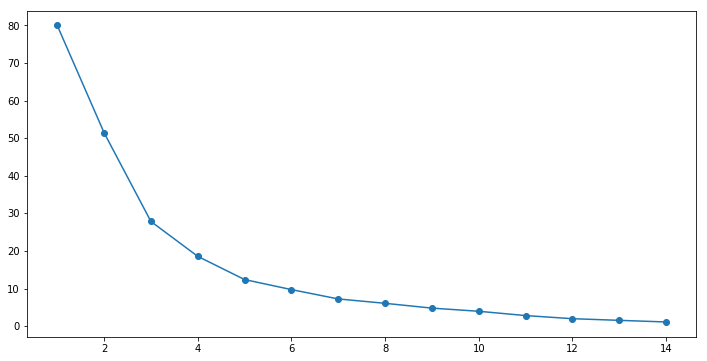

In [34]:
plt.figure(figsize=(12,6))
plt.plot(cluster_range,cluster_errors,marker='o')

From the elbow curve, we can infer that the slope is almost the same from the range = 3.

So, k = 3 (number of clusters)

In [35]:
#Re-build the model with k=3
kmeans = KMeans(n_clusters=3,n_init = 15,random_state = 42)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [36]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.5361335 ,  0.96264295,  0.51632566, -0.61618888],
       [-0.92065895, -0.6352664 , -0.86290041, -0.33288365],
       [ 0.7690509 , -0.6547531 ,  0.69314951,  1.89814505]])

In [37]:
centroid_df = pd.DataFrame(centroids,columns = list(df_scaled))
centroid_df

,calories,sodium,alcohol,cost
0,0.536134,0.962643,0.516326,-0.616189
1,-0.920659,-0.635266,-0.862900,-0.332884
2,0.769051,-0.654753,0.693150,1.898145


In [38]:
df_scaled['label'] = kmeans.labels_
df_scaled.head()

,calories,sodium,alcohol,cost,label
0,0.387913,0.007795,0.433808,-0.456830,0
1,0.625066,0.631369,0.622420,-0.456830,0
2,0.828339,0.007795,-3.149822,-0.102698,1
3,1.268765,-1.239354,0.905338,1.667960,2
4,0.658944,-0.615780,0.716726,1.951265,2


In [39]:
# grouping the clusters seperately for analysis
g0 = df_scaled[df_scaled['label'] == 0]
g1 = df_scaled[df_scaled['label'] == 1]
g2 = df_scaled[df_scaled['label'] == 2]

In [46]:
df_scaled['label'].value_counts()

1    8
0    8
2    4
Name: label, dtype: int64

In [40]:
g0.describe()

,calories,sodium,alcohol,cost,label
count,8.000000,8.000000,8.000000,8.000000,8.0
mean,0.536134,0.962643,0.516326,-0.616189,0.0
std,0.389213,0.620435,0.312524,0.374299,0.0
min,0.218519,0.007795,0.150890,-1.519224,0.0
25%,0.354034,0.592396,0.339502,-0.563069,0.0
50%,0.404853,0.943156,0.433808,-0.456830,0.0
75%,0.574247,1.410837,0.622420,-0.456830,0.0
max,1.438159,1.878518,1.188256,-0.386003,0.0


The beers with label-0 have medium alcohol content and is of medium cost. It has moderate calories and high sodium content.

In [41]:
g1.describe()

,calories,sodium,alcohol,cost,label
count,8.000000,8.000000,8.000000,8.000000,8.0
mean,-0.920659,-0.635266,-0.862900,-0.332884,1.0
std,1.011019,0.585899,1.145898,0.290178,0.0
min,-2.186883,-1.395248,-3.149822,-0.810961,1.0
25%,-1.416138,-1.122434,-1.405160,-0.509949,1.0
50%,-1.085819,-0.693726,-0.320641,-0.244351,1.0
75%,-0.475998,0.007795,-0.037722,-0.155818,1.0
max,0.828339,0.007795,0.056584,0.038954,1.0


The beers with label-1 have low alcohol content and is of low price. It is even comprised of low calories and low sodium content.

In [42]:
g2.describe()

,calories,sodium,alcohol,cost,label
count,4.000000,4.000000,4.000000,4.000000,4.0
mean,0.769051,-0.654753,0.693150,1.898145,2.0
std,0.335811,0.921180,0.194417,0.177066,0.0
min,0.557308,-1.395248,0.433808,1.667960,2.0
25%,0.582717,-1.278327,0.645996,1.827319,2.0
50%,0.625066,-0.927567,0.716726,1.915852,2.0
75%,0.811400,-0.303993,0.763879,1.986678,2.0
max,1.268765,0.631369,0.905338,2.092917,2.0


The beers with label-2 have high alcohol content and is of high cost. It is even comprised of high calories and has low sodium content.

In [66]:
kmeans.inertia_

17.843594755875053

The total inertia for the K-Means model is 17.8435

# Hierarchical Clustering (Agglomerative clustering)

In [47]:
df_scaled1 = df_scaled.drop(['label'],axis = 1)

In [50]:
from sklearn.cluster import AgglomerativeClustering

model2 = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean', linkage = 'complete')
model2.fit(df_scaled1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [51]:
L =pd.DataFrame(model2.labels_)
L[0].value_counts()

2    8
0    8
1    4
Name: 0, dtype: int64

In [53]:
model2 = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean', linkage = 'single')
model2.fit(df_scaled1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='single', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [54]:
L =pd.DataFrame(model2.labels_)
L[0].value_counts()

0    15
2     4
1     1
Name: 0, dtype: int64

In [55]:
model2 = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean', linkage = 'ward')
model2.fit(df_scaled1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [56]:
L =pd.DataFrame(model2.labels_)
L[0].value_counts()

1    8
0    8
2    4
Name: 0, dtype: int64

'Ward' and 'Complete' can be considered as it helps in making better clusters.
Here 'Ward' for linkage and 'Euclidean' for distance caliculation is considered.

In [57]:
df_scaled1['label'] = model2.labels_
df_scaled1.head()

,calories,sodium,alcohol,cost,label
0,0.387913,0.007795,0.433808,-0.456830,1
1,0.625066,0.631369,0.622420,-0.456830,1
2,0.828339,0.007795,-3.149822,-0.102698,0
3,1.268765,-1.239354,0.905338,1.667960,2
4,0.658944,-0.615780,0.716726,1.951265,2


In [58]:
df0 = df_scaled1[df_scaled1['label'] == 0]
df1 = df_scaled1[df_scaled1['label'] == 1]
df2 = df_scaled1[df_scaled1['label'] == 2]

In [59]:
(df0.shape,df1.shape,df2.shape)

((8, 5), (8, 5), (4, 5))

In [60]:
c0 = np.array(df0.iloc[:,0:4].mean())
c0

array([-0.92065895, -0.6352664 , -0.86290041, -0.33288365])

In [61]:
c1 = np.array(df1.iloc[:,0:4].mean())
c1

array([ 0.5361335 ,  0.96264295,  0.51632566, -0.61618888])

In [62]:
c2 = np.array(df2.iloc[:,0:4].mean())
c2

array([ 0.7690509 , -0.6547531 ,  0.69314951,  1.89814505])

In [63]:
I0 = 0
I1 = 0
I2 = 0
for i in np.arange(df0.shape[0]):
    I0 = I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
    I1 = I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    I2 = I2+np.sum((df2.iloc[i,:-1]-c2)**2)

In [64]:
total_inertia = I0 + I1 + I2
total_inertia

27.849901261962508

The inertia for Agglomerative clustering model is 27.849.


Both the models predict the same number of elements in the clusters.

Considering the inertia of both the models, K-means can be used as a better model for clustering the beers.

# Plotting the clusters on a Dendrogram

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage

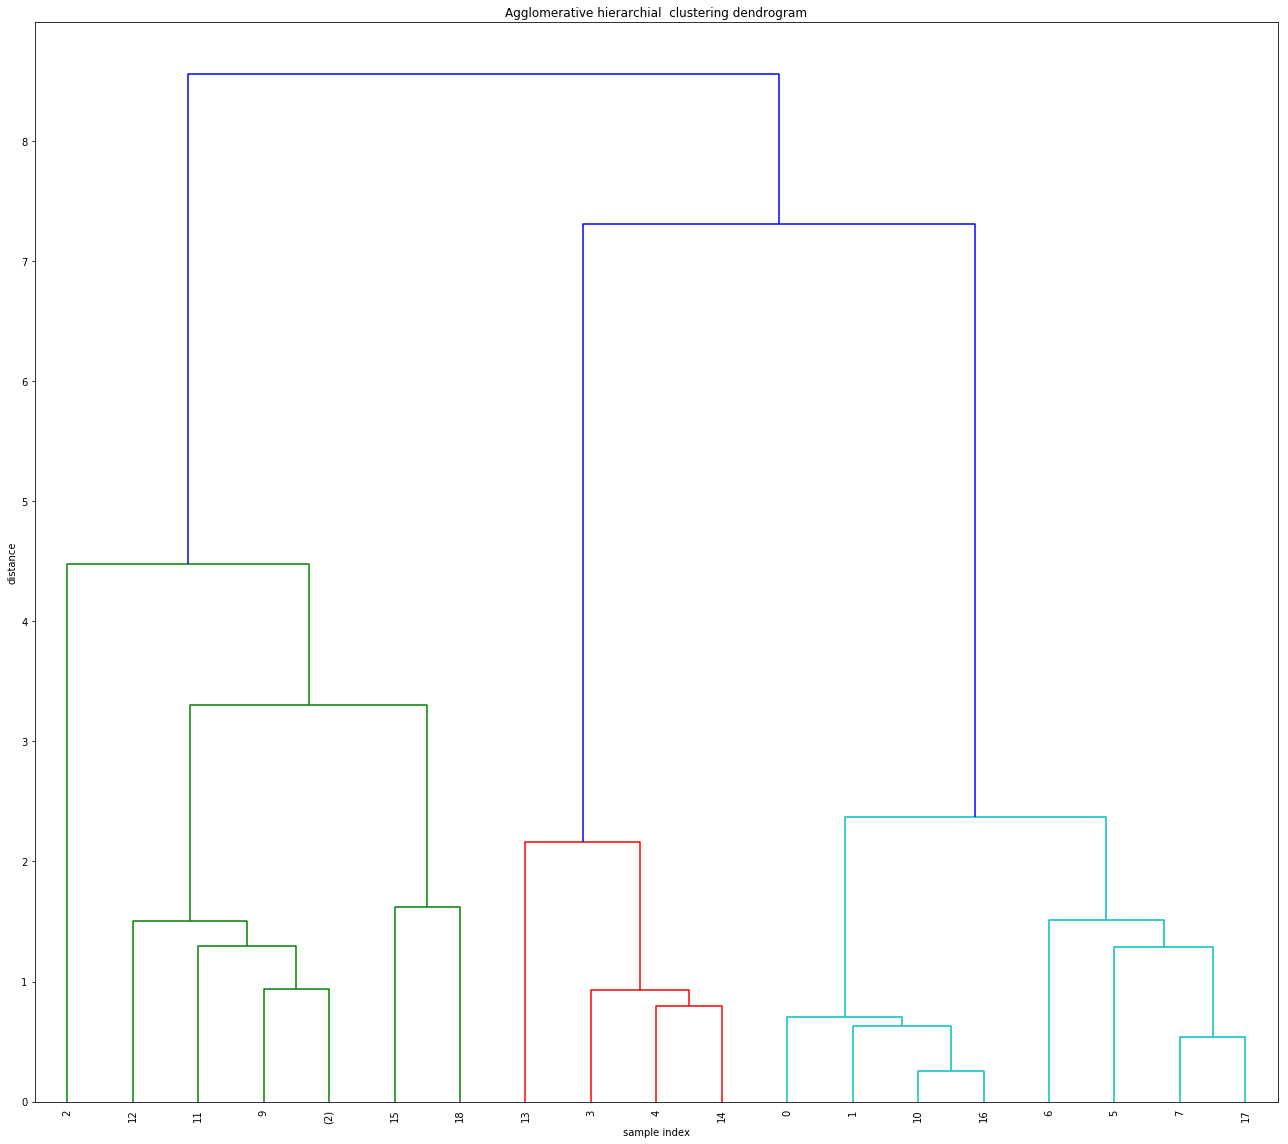

In [71]:
plt.figure(figsize=(18,16))
plt.title('Agglomerative hierarchial  clustering dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
Z = linkage(df_scaled1,'ward')
dendrogram(Z,leaf_rotation = 90.0,p = 5,color_threshold = 5,leaf_font_size = 10,truncate_mode = 'level')
plt.tight_layout()

In [76]:
df_scaled1.iloc[9]

calories   -0.662332
sodium     -1.083460
alcohol    -0.509253
cost       -0.669309
label       0.000000
Name: 9, dtype: float64

In [77]:
df_scaled1.iloc[13]

calories    0.591187
sodium      0.631369
alcohol     0.433808
cost        1.880438
label       2.000000
Name: 13, dtype: float64

From the above dendrogram, we can infer that, Green clusters belong to Label 0, Red clusters belong to Label 2 and Blue clusters belong to Label 3.